<a href="https://colab.research.google.com/github/DLSireesha/Airline-Passenger-Satisfaction-Prediction/blob/main/Airline_Passenger_Satisfaction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
# Disable the warning messages
import warnings
warnings.filterwarnings('ignore')

Import datset

In [2]:
data=pd.read_csv("/content/Airline train.csv")

visualize the first five rows

In [3]:
data.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


Shape of the Dataset

In [4]:
data.shape

(103904, 25)

In [5]:
data.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

Information of the Dataset

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

Description of the Dataset

In [7]:
data.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,51951.500000,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,29994.645522,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25975.750000,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,51951.500000,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,77927.250000,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


Dropping unwanted columns

In [8]:
data=data.drop(['Unnamed: 0','id'],axis=1)

Checking Null values

In [9]:
data.isnull().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

Filling null values with mean

In [10]:
m=data['Arrival Delay in Minutes'].mean()

In [11]:
data['Arrival Delay in Minutes'].fillna(m,inplace=True)

In [12]:
data.head(2)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied


In [13]:
data.isnull().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [14]:
data._get_numeric_data().columns

Index(['Age', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes',
       'Arrival Delay in Minutes'],
      dtype='object')

In [15]:
data.select_dtypes(include=['object']).columns.tolist()

['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction']

In [16]:
data['Customer Type'].unique()

array(['Loyal Customer', 'disloyal Customer'], dtype=object)

In [17]:
data['Type of Travel'].unique()

array(['Personal Travel', 'Business travel'], dtype=object)

In [18]:
data['Class'].unique()

array(['Eco Plus', 'Business', 'Eco'], dtype=object)

In [19]:
data['satisfaction'].unique()

array(['neutral or dissatisfied', 'satisfied'], dtype=object)

Converting Categorical values to Numerical values

In [20]:
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
data['Gender']=l.fit_transform(data['Gender'])
data['Customer Type']=l.fit_transform(data['Customer Type'])
data['Type of Travel']=l.fit_transform(data['Type of Travel'])
data['Class']=l.fit_transform(data['Class'])
data['satisfaction']=l.fit_transform(data['satisfaction'])

In [21]:
data.dtypes

Gender                                 int64
Customer Type                          int64
Age                                    int64
Type of Travel                         int64
Class                                  int64
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
satisfacti

In [22]:
data['satisfaction'].value_counts()

0    58879
1    45025
Name: satisfaction, dtype: int64

Correlation between features

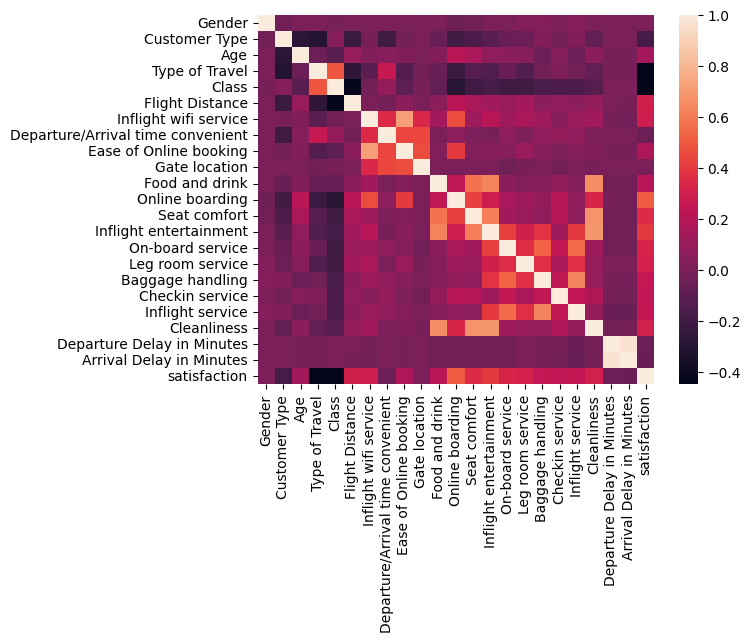

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(data.corr())
plt.show()

In [24]:
data.head(3)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1,0,13,1,2,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,0
1,1,1,25,0,0,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,0
2,0,0,26,0,0,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1


In [25]:
data['Arrival Delay in Minutes']=data['Arrival Delay in Minutes'].astype(int)

In [26]:
x=data.iloc[ : ,:-1]
y=data['satisfaction']

Splitting the Dataset into training and testing data with the ratio 70:30

In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=10)

In [28]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(72732, 22)
(31172, 22)
(72732,)
(31172,)


In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

Fit the Model using Logistic Regression

In [30]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [31]:
y_t1=lr.predict(x_train)
y_t2=lr.predict(x_test)
print(classification_report(y_train,y_t1))
print(classification_report(y_test,y_t2))

              precision    recall  f1-score   support

           0       0.88      0.91      0.89     41305
           1       0.87      0.83      0.85     31427

    accuracy                           0.87     72732
   macro avg       0.87      0.87      0.87     72732
weighted avg       0.87      0.87      0.87     72732

              precision    recall  f1-score   support

           0       0.88      0.91      0.89     17574
           1       0.88      0.84      0.86     13598

    accuracy                           0.88     31172
   macro avg       0.88      0.87      0.88     31172
weighted avg       0.88      0.88      0.88     31172



In [32]:
print(accuracy_score(y_train,y_t1))
print(accuracy_score(y_test,y_t2))

0.8744981576197547
0.878063646862569


Fitting the model using KNN

In [33]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [34]:
ytrain_pred=knn.predict(x_train)
ytest_pred=knn.predict(x_test)
print(classification_report(y_train,ytrain_pred))
print(classification_report(y_test,ytest_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95     41305
           1       0.97      0.91      0.94     31427

    accuracy                           0.95     72732
   macro avg       0.95      0.94      0.95     72732
weighted avg       0.95      0.95      0.95     72732

              precision    recall  f1-score   support

           0       0.91      0.97      0.94     17574
           1       0.95      0.88      0.91     13598

    accuracy                           0.93     31172
   macro avg       0.93      0.92      0.93     31172
weighted avg       0.93      0.93      0.93     31172



In [35]:
print(accuracy_score(y_train,ytrain_pred))
print(accuracy_score(y_test,ytest_pred))

0.947725897816642
0.9284935198254844


Fitting the model using Naive Bayes Classifier

In [36]:
from sklearn.naive_bayes import GaussianNB
g=GaussianNB()
g.fit(x_train,y_train)

GaussianNB()

In [37]:
g1=g.predict(x_train)
g2=g.predict(x_test)
print(classification_report(y_train,g1))
print(classification_report(y_test,g2))

              precision    recall  f1-score   support

           0       0.87      0.90      0.88     41305
           1       0.86      0.82      0.84     31427

    accuracy                           0.86     72732
   macro avg       0.86      0.86      0.86     72732
weighted avg       0.86      0.86      0.86     72732

              precision    recall  f1-score   support

           0       0.87      0.90      0.89     17574
           1       0.87      0.82      0.84     13598

    accuracy                           0.87     31172
   macro avg       0.87      0.86      0.86     31172
weighted avg       0.87      0.87      0.87     31172



In [38]:
print(accuracy_score(y_train,g1))
print(accuracy_score(y_test,g2))

0.8635126216795909
0.8677338637238547


Fitting the model using Decision Tree




In [39]:
from sklearn.tree import DecisionTreeClassifier
d=DecisionTreeClassifier(criterion='entropy',random_state=0)
d.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [40]:
d1=d.predict(x_train)
d2=d.predict(x_test)
print(classification_report(y_train,d1))
print(classification_report(y_test,d2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     41305
           1       1.00      1.00      1.00     31427

    accuracy                           1.00     72732
   macro avg       1.00      1.00      1.00     72732
weighted avg       1.00      1.00      1.00     72732

              precision    recall  f1-score   support

           0       0.95      0.95      0.95     17574
           1       0.94      0.94      0.94     13598

    accuracy                           0.95     31172
   macro avg       0.94      0.95      0.95     31172
weighted avg       0.95      0.95      0.95     31172



In [41]:
print(accuracy_score(y_train,d1))
print(accuracy_score(y_test,d2))

1.0
0.9459129988451174


Fitting the model using Random Forest Classifier

In [42]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=50)
rfc.fit(x_train,y_train)

RandomForestClassifier(n_estimators=50)

In [43]:
r1=rfc.predict(x_train)
r2=rfc.predict(x_test)
print(classification_report(y_train,r1))
print(classification_report(y_test,r2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     41305
           1       1.00      1.00      1.00     31427

    accuracy                           1.00     72732
   macro avg       1.00      1.00      1.00     72732
weighted avg       1.00      1.00      1.00     72732

              precision    recall  f1-score   support

           0       0.95      0.98      0.97     17574
           1       0.97      0.93      0.95     13598

    accuracy                           0.96     31172
   macro avg       0.96      0.96      0.96     31172
weighted avg       0.96      0.96      0.96     31172



In [44]:
print(accuracy_score(y_train,r1))
print(accuracy_score(y_test,r2))

0.9999450035747677
0.9602527909662517


Testing data

In [45]:
test=pd.read_csv("/content/Airline test.csv")
test.head(5)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [46]:
test.shape

(25976, 25)

In [47]:
test.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.00000,25893.000000
mean,12987.500000,65005.657992,39.620958,1193.788459,2.724746,3.046812,2.756775,2.977094,3.215353,3.261665,3.449222,3.357753,3.385664,3.350169,3.633238,3.314175,3.649253,3.286226,14.30609,14.740857
std,7498.769632,37611.526647,15.135685,998.683999,1.335384,1.533371,1.412951,1.282133,1.331506,1.355536,1.320090,1.338299,1.282088,1.318862,1.176525,1.269332,1.180681,1.319330,37.42316,37.517539
min,0.000000,17.000000,7.000000,31.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000
25%,6493.750000,32170.500000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.00000,0.000000
50%,12987.500000,65319.500000,40.000000,849.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.00000,0.000000
75%,19481.250000,97584.250000,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.00000,13.000000
max,25975.000000,129877.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1128.00000,1115.000000


In [48]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         25976 non-null  int64  
 1   id                                 25976 non-null  int64  
 2   Gender                             25976 non-null  object 
 3   Customer Type                      25976 non-null  object 
 4   Age                                25976 non-null  int64  
 5   Type of Travel                     25976 non-null  object 
 6   Class                              25976 non-null  object 
 7   Flight Distance                    25976 non-null  int64  
 8   Inflight wifi service              25976 non-null  int64  
 9   Departure/Arrival time convenient  25976 non-null  int64  
 10  Ease of Online booking             25976 non-null  int64  
 11  Gate location                      25976 non-null  int

In [49]:
test=test.drop(['Unnamed: 0','id'],axis=1)

In [50]:
test.isnull().sum()

Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction                          0
dtype: int64

In [51]:
k=test['Arrival Delay in Minutes'].mean()

In [52]:
test['Arrival Delay in Minutes'].fillna(k,inplace=True)

In [53]:
test.isnull().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [54]:
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
test['Gender']=l.fit_transform(test['Gender'])
test['Customer Type']=l.fit_transform(test['Customer Type'])
test['Type of Travel']=l.fit_transform(test['Type of Travel'])
test['Class']=l.fit_transform(test['Class'])
test['satisfaction']=l.fit_transform(test['satisfaction'])

In [55]:
xtest=test.iloc[:,:-1]
xtest.shape

(25976, 22)

In [56]:
# Create input data as a NumPy array
input_data = np.array([[0,0,52,1,2,460,3,4,0,1,3,3,1,5,4,3,4,4,5,5,25,18.0]])
input_data_as_array=np.asarray(input_data)
reshape=input_data_as_array.reshape(1,-1)
# Make predictions
prediction = rfc.predict(reshape)

# Print the prediction
if prediction[0] == 1:
    print("satisfied")
else:
    print("Not satisfied")

satisfied


Saving the trained model

In [57]:
import pickle

In [58]:
file="Airline_Satisfaction.pkl"
pickle.dump(rfc,open(file,'wb'))

In [59]:
from pandas.io.xml import preprocess_data
with open('Airline_Satisfaction.pkl','rb') as model_file:
  model=pickle.load(model_file)
airline=preprocess_data(xtest)
pred=model.predict(airline)

In [60]:
for x in data.columns:
  print(x)

Gender
Customer Type
Age
Type of Travel
Class
Flight Distance
Inflight wifi service
Departure/Arrival time convenient
Ease of Online booking
Gate location
Food and drink
Online boarding
Seat comfort
Inflight entertainment
On-board service
Leg room service
Baggage handling
Checkin service
Inflight service
Cleanliness
Departure Delay in Minutes
Arrival Delay in Minutes
satisfaction
